<a href="https://colab.research.google.com/github/dantae74/machine-learning/blob/main/06-02-softmax-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

모두를 위한 머신러닝에서 가져왔습니다.
# softmax classification

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# Predicting animal type based on various features
url = 'https://raw.githubusercontent.com/hunkim/DeepLearningZeroToAll/master/data-04-zoo.csv'
xy = np.loadtxt(url, delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [6]:
print(x_data.shape, y_data.shape)

(101, 16) (101, 1)


In [7]:
nb_classes = 7  # 0 ~ 6

In [ ]:
# Convert y_data to one_hot
y_one_hot = tf.keras.utils.to_categorical(y_data, nb_classes)
print("one_hot:", y_one_hot)

In [9]:
tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=nb_classes, input_dim=16, activation='softmax'))
tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.1), metrics=['accuracy'])
tf.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 119       
Total params: 119
Trainable params: 119
Non-trainable params: 0
_________________________________________________________________


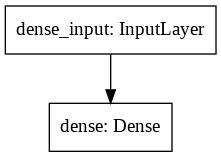

In [10]:
tf.keras.utils.plot_model(tf.model)

In [11]:
history = tf.model.fit(x_data, y_one_hot, epochs=1000, verbose=0)

In [13]:
# Single data test
test_data = np.array([[0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0]]) # expected prediction == 3 (feathers)
pred_y = tf.model.predict(test_data)
print(pred_y, np.argmax(pred_y, axis=-1))

[[6.2267412e-04 1.3443010e-03 8.0957301e-03 9.8521036e-01 3.7457237e-03
  5.6749320e-07 9.8069513e-04]] [3]


In [14]:
# Full x_data test
# pred = tf.model.predict_classes(x_data)
pred = np.argmax(tf.model.predict(x_data), axis=-1)
for p, y in zip(pred, y_data.flatten()):
    print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))

[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 3 True Y: 3
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 1 True Y: 1
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 5 True Y: 5
[True] Prediction: 4 True Y: 4
[True] Prediction: 4 True Y: 4
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 5 True Y: 5
[True] Prediction: 0 True Y: 0
[True] P